In [5]:
import sys
sys.path.append("/content/drive/My Drive/snakeAI")

import tensorflow as tf
import tensorflow.keras as k

import os
from datetime import datetime

from Snake.environment import SnakeMaze
from Snake.variables import Status, Cell
from Snake.utils import resize_image, generate_animation

import numpy as np


In [6]:
training_path = os.path.join(*['drive', 'My Drive', 'snakeAI', 'trainings', 'NonConvolutional', '28Jun2020__211800441268', 'model'])
model = k.Sequential([
                      k.layers.Input(58, name='InputLayer'),
                      k.layers.Dense(40, activation='relu', kernel_regularizer=k.regularizers.l1_l2(), name='FirstDense'),
                      k.layers.Dropout(.5, name='FirstDropout'),
                      k.layers.Dense(20, activation='relu', kernel_regularizer=k.regularizers.l1_l2(), name='SecondDense'),
                      k.layers.Dropout(.5, name='SecondDropout'),
                      k.layers.Dense(4, activation='softmax', kernel_regularizer=k.regularizers.l1_l2(), name='ThirdDense'),
], name='NonSequential')
model.load_weights(training_path)

In [7]:
def get_observation(env, handle=0, local_knowledge=5):
  snake = env.snakes[handle]

  if snake.status == Status.DEAD:
    return np.zeros((33 + local_knowledge**2 ))

  snake_position = snake.body[0]

  env_width, env_height, = env.matrix.shape

  directions_offsets = [(0, 1), (-1, 0), (1, 0), (0, -1), (-1, 1), (1, -1), (1, 1), (-1, -1)]
  features = []

  for offset_x, offset_y in directions_offsets: 
    distances_to_cell_type = {c: -1 for c in Cell.CELL_DICT.values()}
    tmp_x, tmp_y = snake_position
    tmp_x += offset_x
    tmp_y += offset_y
    
    distance = 1
    while (-1 < tmp_x < env_height) and (-1 < tmp_y < env_width):
      curr_cell_type = env.matrix[tmp_x, tmp_y]
      if distances_to_cell_type[curr_cell_type] == -1:
        distances_to_cell_type[curr_cell_type] = distance
      distance += 1
      tmp_x += offset_x
      tmp_y += offset_y

    del distances_to_cell_type[Cell.EMPTY_CELL]
    features.extend(distances_to_cell_type.values())
  
  features.append(len(snake.body))

  tmp_matrix = np.pad(env.matrix, local_knowledge)
  tmp_matrix = tmp_matrix[
                          snake_position[0]: snake_position[0]+local_knowledge, 
                          snake_position[1]: snake_position[1]+local_knowledge, 
                          ]
  features.extend(tmp_matrix.flatten())
  
  return np.array(features)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Game over!
____________________________________
Generating annimation:


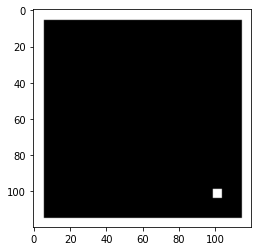

In [8]:
env = SnakeMaze(20, 20, 1)
env.reset()
imgs = []
while env.num_active_agents > 0:
  obs = get_observation(env)
  q = model(obs.reshape(1, -1))
  env.step({0: np.argmax(q)})
  imgs.append(resize_image(env.snake_matrices[0]))
print("Game over!")
print("____________________________________")
print("Generating annimation:")
generate_animation(imgs)